In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from google.colab.patches import cv2_imshow

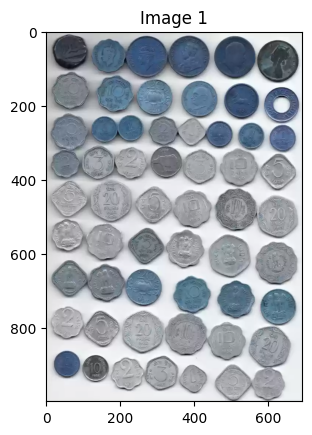

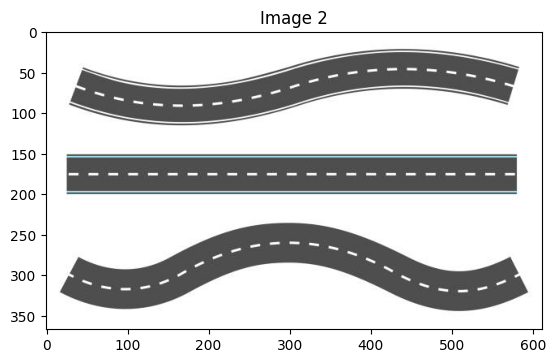

In [8]:
# Task-1: Image Segmentation and Object Identification using Hough Transform
# Load image
i_image = "/content/circular.webp"
j_image = "/content/roads.jpg"
image = cv2.imread(j_image)
img = cv2.imread(i_image)
plt.imshow(img, cmap='gray')
plt.title('Image 1')
plt.show()
plt.imshow(image, cmap='gray')
plt.title('Image 2')
plt.show()

2) Grayscale Image:


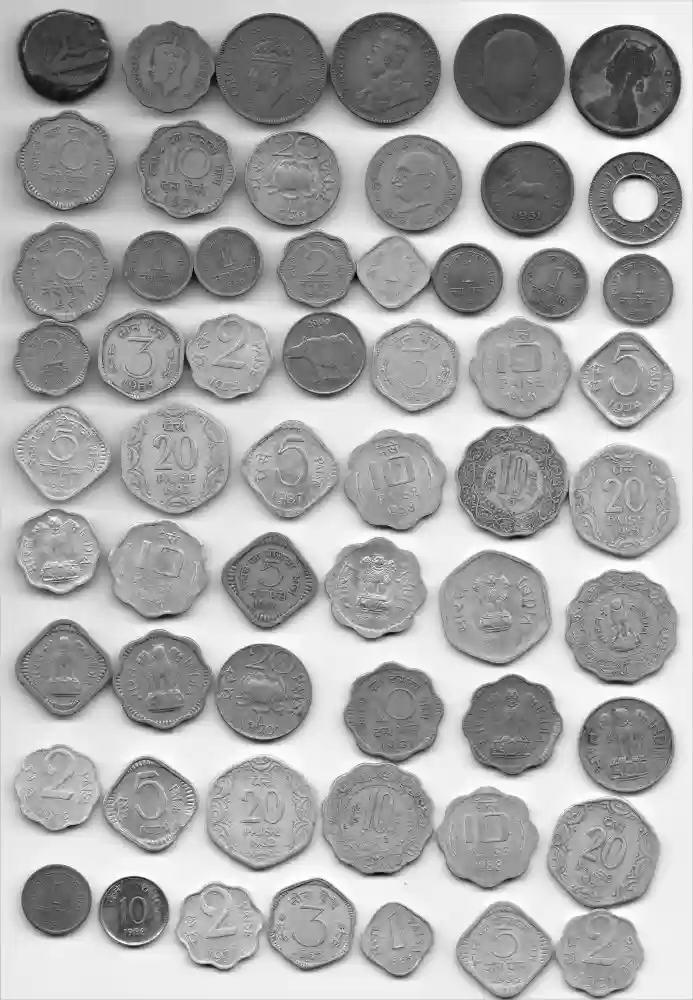

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("2) Grayscale Image:")
cv2_imshow(gray)

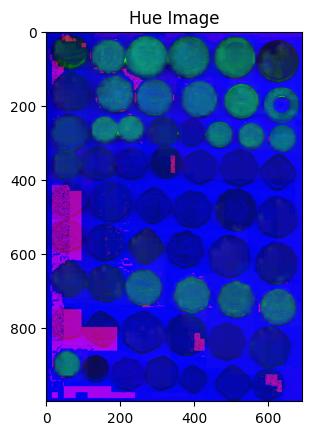

In [15]:
# Convert to HSV before morphological operations
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img, cmap='gray')
plt.title('Hue Image')
plt.show()

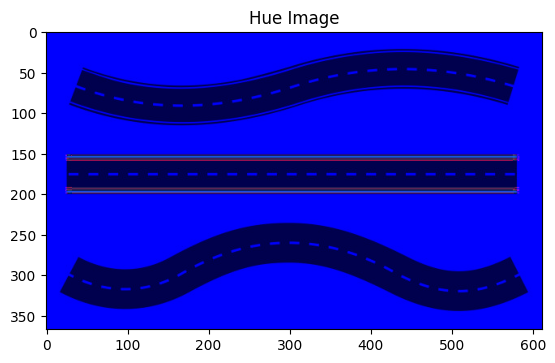

In [22]:
# Convert to HSV before morphological operations
hsv_img_1 = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img_1, cmap='gray')
plt.title('Hue Image')
plt.show()

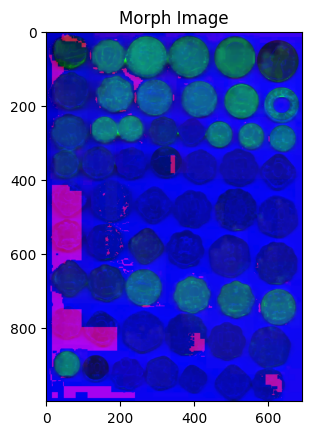

In [23]:
# Apply morphological operations (Closing to remove noise)
kernel = np.ones((5,5), np.uint8)
morph_img = cv2.morphologyEx(hsv_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_img, cmap='gray')
plt.title('Morph Image')
plt.show()

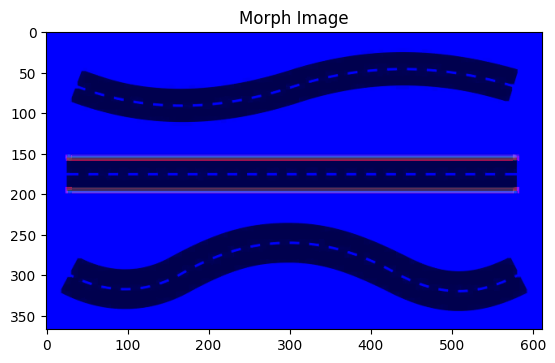

In [24]:
# Apply morphological operations (Closing to remove noise)
kernel = np.ones((5,5), np.uint8)
morph_img_1 = cv2.morphologyEx(hsv_img_1, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_img_1, cmap='gray')
plt.title('Morph Image')
plt.show()

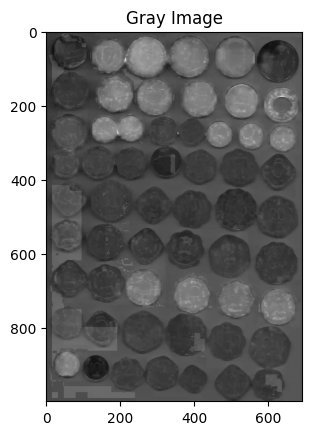

In [48]:
# Convert to grayscale for further processing
gray_img = cv2.cvtColor(morph_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray Image')
plt.show()

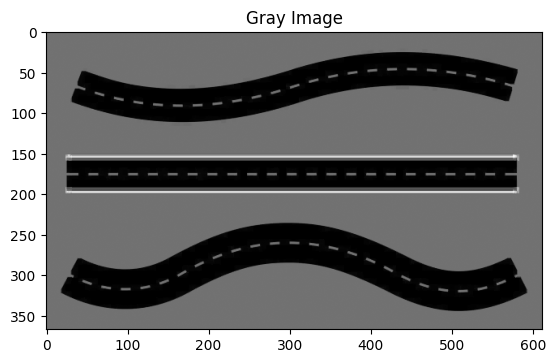

In [49]:
# Convert to grayscale for further processing
gray_img_1 = cv2.cvtColor(morph_img_1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img_1, cmap='gray')
plt.title('Gray Image')
plt.show()

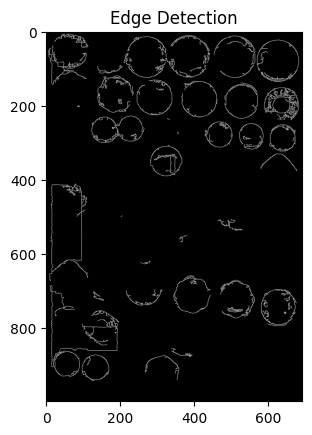

In [66]:
# Apply Edge Detection (Canny)
edges = cv2.Canny(gray_img, 20, 150)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

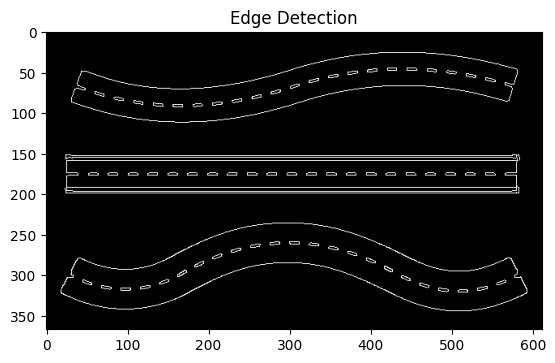

In [31]:
# Apply Edge Detection (Canny)
edges_1 = cv2.Canny(gray_img_1, 50, 150)
plt.imshow(edges_1, cmap='gray')
plt.title('Edge Detection')
plt.show()

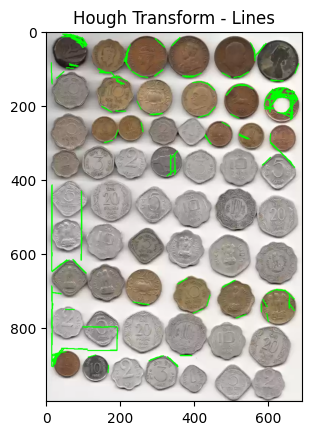

In [35]:
# Hough Transform for Lines
detected_lines = cv2.HoughLinesP(edges, 10, np.pi/180, 50, minLineLength=20, maxLineGap=10)
if detected_lines is not None:
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Lines')
plt.show()

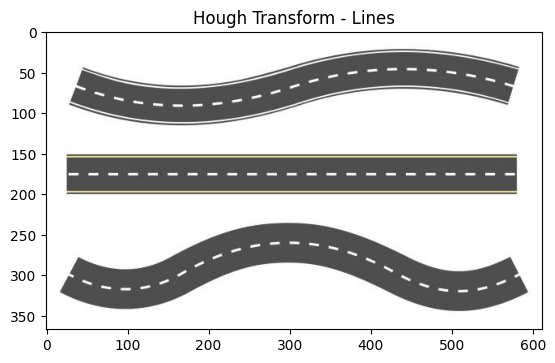

In [37]:
# Hough Transform for Lines
detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=10)
if detected_lines is not None:
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Lines')
plt.show()

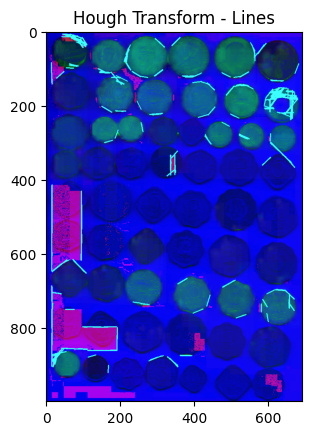

In [38]:
# Hough Transform for Lines
detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=10)
if detected_lines is not None:
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
plt.title('Hough Transform - Lines')
plt.show()

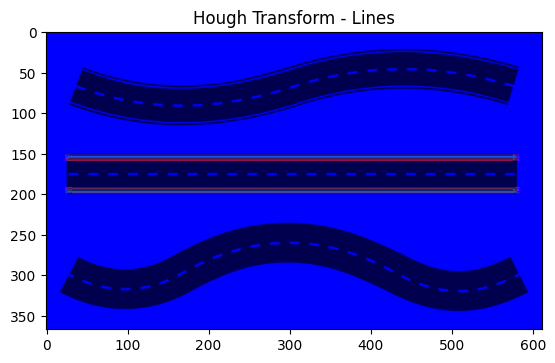

In [39]:
# Hough Transform for Lines
detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=10)
if detected_lines is not None:
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
plt.title('Hough Transform - Lines')
plt.show()

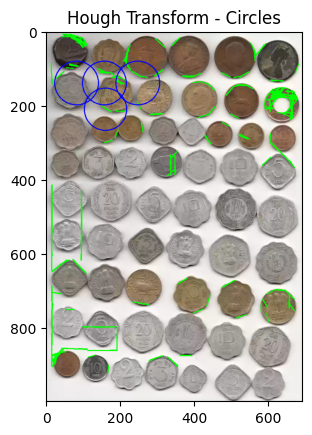

In [42]:
# Hough Transform for Circles
detected_circles = cv2.HoughCircles(gray_img_1, cv2.HOUGH_GRADIENT, dp=1.5, minDist=60, param1=80, param2=35, minRadius=10, maxRadius=60)
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for circle in detected_circles[0, :]:
        cv2.circle(img, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Circles')
plt.show()

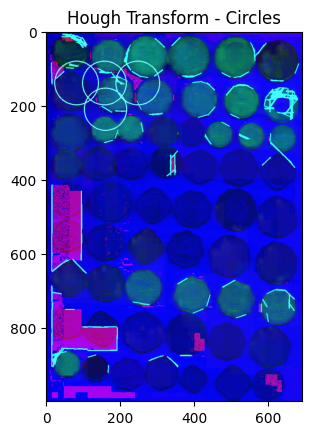

In [43]:
# Hough Transform for Circles
detected_circles = cv2.HoughCircles(gray_img_1, cv2.HOUGH_GRADIENT, dp=1.5, minDist=60, param1=80, param2=35, minRadius=10, maxRadius=60)
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for circle in detected_circles[0, :]:
        cv2.circle(img, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
plt.title('Hough Transform - Circles')
plt.show()

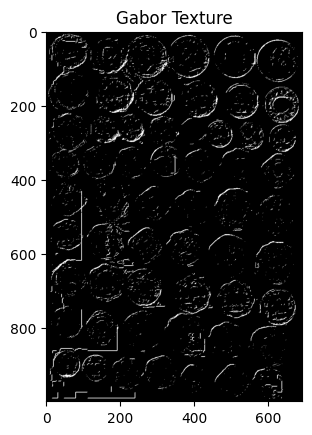

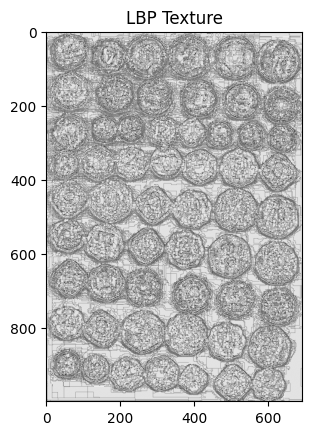

In [50]:
from skimage.filters import gabor
# Texture Feature Extraction (Gabor and LBP)
_, gabor_img = gabor(gray_img, frequency=1.0, theta=0.8)
lbp_img = local_binary_pattern(gray_img, P=8, R=1, method='uniform')

plt.imshow(gabor_img, cmap='gray')
plt.title('Gabor Texture')
plt.show()

plt.imshow(lbp_img, cmap='gray')
plt.title('LBP Texture')
plt.show()

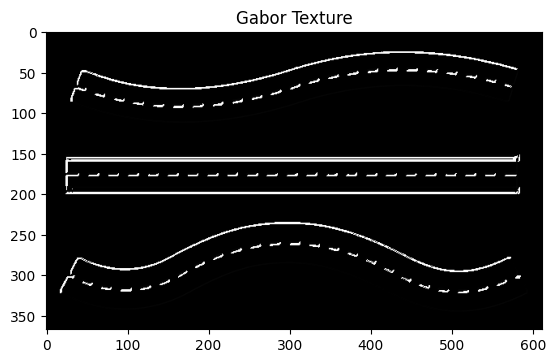

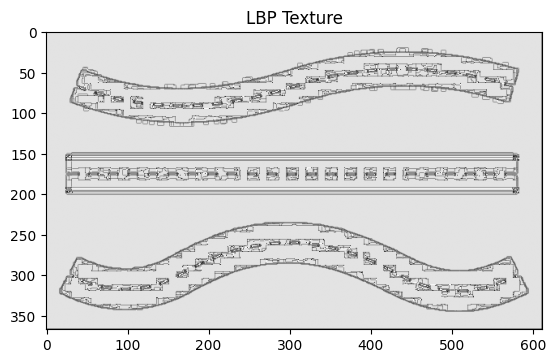

In [53]:
# Texture Feature Extraction (Gabor and LBP)
_, gabor_img_1 = gabor(gray_img_1, frequency=1.0, theta=0.8)
lbp_img_1 = local_binary_pattern(gray_img_1, P=8, R=1, method='uniform')

plt.imshow(gabor_img_1, cmap='gray')
plt.title('Gabor Texture')
plt.show()

plt.imshow(lbp_img_1, cmap='gray')
plt.title('LBP Texture')
plt.show()


In [56]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [57]:
import cv2
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 15.4MB/s]


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 780.3ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 298.3ms
Speed: 12.1ms preprocess, 539.3ms inference, 22.2ms postprocess per image at shape (1, 3, 384, 640)


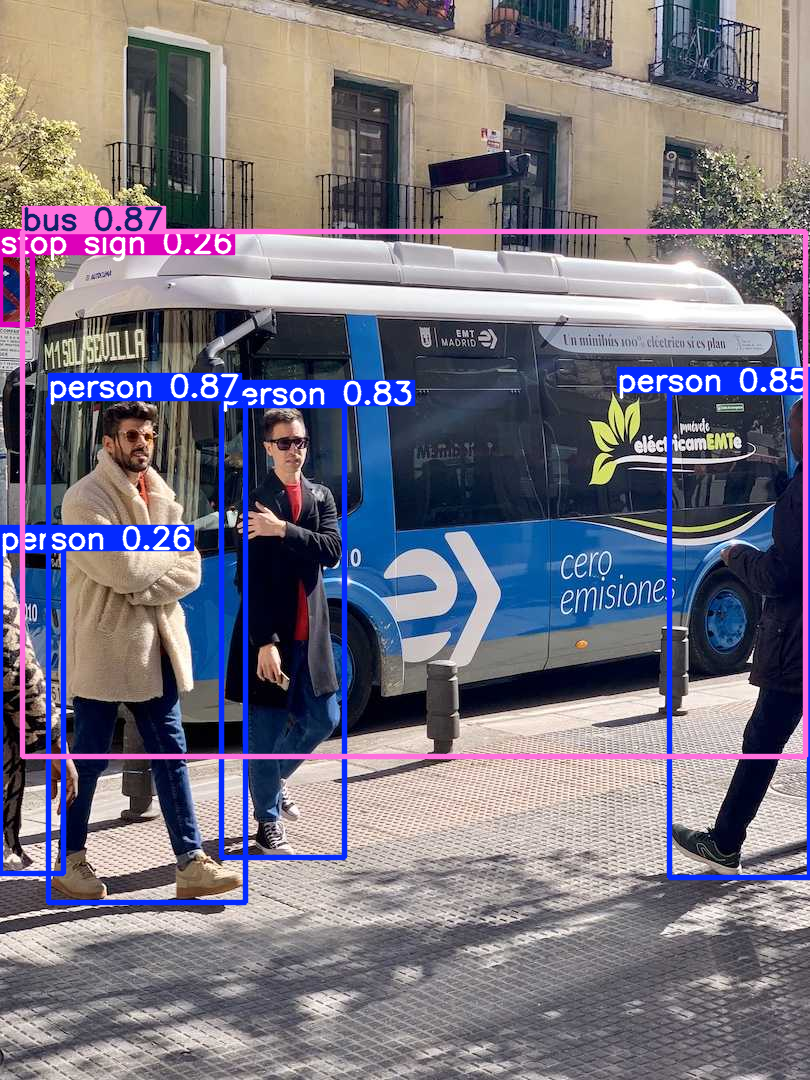

In [58]:
def yolo_object_detection():
    model = YOLO("yolov8n.pt")
    image_path = "https://ultralytics.com/images/zidane.jpg"  # image with people
    image = cv2.imread(image_path)
    results = model(image)
    results[0].show()
# YOLO detection
yolo_object_detection()

In [59]:
from sklearn.metrics import classification_report, roc_curve, auc
# Fashion MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.73MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 131kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.49MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.8MB/s]


Epoch 1/50, Loss: 407.9664
Epoch 2/50, Loss: 259.1551
Epoch 3/50, Loss: 215.1243
Epoch 4/50, Loss: 185.5252
Epoch 5/50, Loss: 160.7828
Epoch 6/50, Loss: 139.1870
Epoch 7/50, Loss: 118.6737
Epoch 8/50, Loss: 101.0614
Epoch 9/50, Loss: 85.7683
Epoch 10/50, Loss: 71.2307
Epoch 11/50, Loss: 59.1951
Epoch 12/50, Loss: 49.6824
Epoch 13/50, Loss: 40.7438
Epoch 14/50, Loss: 40.4509
Epoch 15/50, Loss: 31.1530
Epoch 16/50, Loss: 29.5087
Epoch 17/50, Loss: 23.4645
Epoch 18/50, Loss: 23.4162
Epoch 19/50, Loss: 23.0581
Epoch 20/50, Loss: 20.3982
Epoch 21/50, Loss: 18.5123
Epoch 22/50, Loss: 19.4575
Epoch 23/50, Loss: 18.8606
Epoch 24/50, Loss: 16.9178
Epoch 25/50, Loss: 15.6996
Epoch 26/50, Loss: 16.2238
Epoch 27/50, Loss: 14.3374
Epoch 28/50, Loss: 18.2291
Epoch 29/50, Loss: 11.4183
Epoch 30/50, Loss: 15.2049
Epoch 31/50, Loss: 16.0582
Epoch 32/50, Loss: 9.2857
Epoch 33/50, Loss: 12.2783
Epoch 34/50, Loss: 11.9009
Epoch 35/50, Loss: 13.9074
Epoch 36/50, Loss: 13.7899
Epoch 37/50, Loss: 8.9126
Epoc

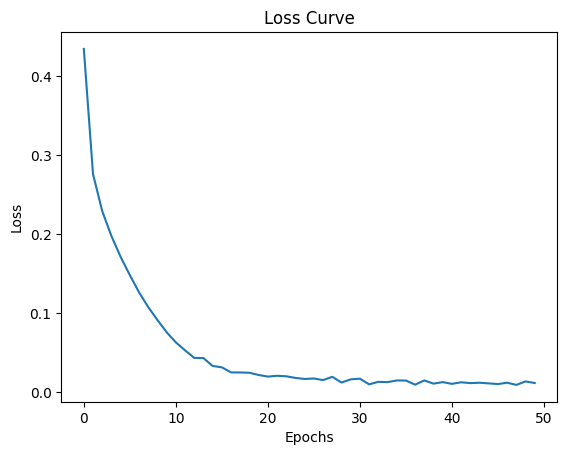

In [62]:
# CNN Model
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, trainloader, epochs=50):
    loss_values = []
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        loss_values.append(running_loss/len(trainloader))
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")
    return loss_values

loss_values = train_model(model, trainloader)

plt.plot(loss_values)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [63]:
# Model Evaluation
def evaluate_model(model, testloader):
    all_preds, all_labels = [], []
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())
    accuracy = correct / total
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(classification_report(all_labels, all_preds))

evaluate_model(model, testloader)

Accuracy: 91.50%
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       1.00      0.99      0.99      1000
           2       0.84      0.90      0.87      1000
           3       0.93      0.90      0.92      1000
           4       0.85      0.90      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.70      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.92      0.91     10000

